## way 1

In [ ]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

print(type(areas))
print('areas: \n', areas)
print('prices: \n', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [ ]:
# vector [x, b]
data = np.c_[areas, np.ones((N, 1))]
data = data.T
print('data \n', data)

theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta \n', theta)
print(theta.shape)

In [ ]:
epoch_max = 10
m = 2
for epoch in range(epoch_max):
    for i in range(0, N, m): 
        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        print('x: \n', x)
        print('y: \n', y)
        
        break
    break

In [ ]:
    # params
    lr = 0.01
    epoch_max = 10
    m = 2

    losses = [] # for debug
    for epoch in range(epoch_max):
        for i in range(0, N, m):    
            
            # get m samples
            x = data[:, i:i+m]
            y = prices[i:i+m, :]
            
            # predict y_hat
            y_hat = theta.T.dot(x)
                    
            # compute loss
            loss = np.multiply((y_hat-y.T), (y_hat-y.T))
            losses.append(np.mean(loss))
            
            # compute gradient
            k = 2*(y_hat-y.T)
            gradients = np.multiply(x, np.vstack( (k, k) ))
            gradients = gradients.dot( np.ones((m, 1)) )/m

            # update weights
            theta = theta - lr*gradients

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [ ]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

## way 2

<class 'numpy.ndarray'>
areas: 
 [6.7 4.6 3.5 5.5]
prices: 
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]
data_size:  4


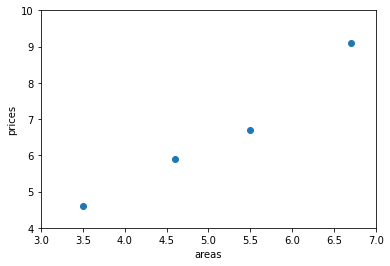

In [1]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

print(type(areas))
print('areas: \n', areas)
print('prices: \n', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [2]:
# vector [x, b]
data = np.c_[areas, np.ones((N, 1))]
print(data)

theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta \n', theta)
print(theta.shape)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
theta 
 [[-0.34]
 [ 0.04]]
(2, 1)


In [3]:
epoch_max = 10
m = 2
for epoch in range(epoch_max):
    for i in range(0, N, m):        
        # get m samples
        x = data[i:i+m, :]
        y = prices[i:i+m, :]
        
        print(x)
        print(y)
        
        break
    break

[[6.7 1. ]
 [4.6 1. ]]
[[9.1]
 [5.9]]


In [4]:
# params
lr = 0.01
epoch_max = 10
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, N, m):        
        # get m samples
        x = data[i:i+m, :]
        y = prices[i:i+m, :]
        
        # predict y_hat
        y_hat = x.dot(theta)
        
        # compute loss
        loss = np.multiply((y_hat-y), (y_hat-y))
        losses.append(np.mean(loss))
        
        # compute gradient
        k = 2*(y_hat-y)  
        gradients = np.multiply(x, np.hstack([k, k]))
        gradients = np.ones((1, m)).dot(gradients)/m

        # update weights
        theta = theta - lr*gradients.T

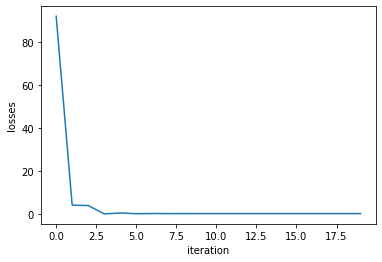

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

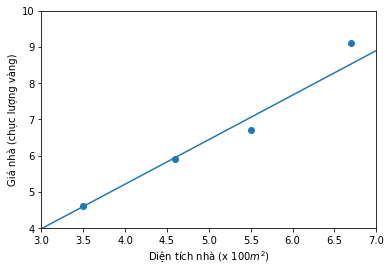

In [6]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [ ]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [ ]:
import numpy as np
from numpy import genfromtxt

data   = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T
print(data)

# init weight
lr = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta', theta.shape)

# how long
epoch_max = 10

# mini-batch size
m = 2

for epoch in range(epoch_max):    
    for i in range(0, data_size, m):
        print(i)
        x = data[:, i:i+m]
        y = prices[i:i+m, :]        
        print('x: \n', x, x.shape)
        print('y: \n', y, y.shape)
        
        # predict y_hat
        y_hat = theta.T.dot(x)
        print('y_hat: \n', y_hat)
        
        loss = np.multiply((y_hat-y.T), (y_hat-y.T))
        print('loss: \n', loss)
        
        # compute gradient
        b = 2*(y_hat-y.T)
        print("b: \n", b)

        gradient = np.multiply(x, np.vstack((b, b)))        
        gradient = gradient.dot(np.ones((m, 1)))/m
        print('gradient: \n', gradient)

        theta = theta - lr*gradient
        print('theta: \n', theta)

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        # predict y_hat
        y_hat = theta.T.dot(x)
        
        # compute loss
        loss = np.multiply((y_hat-y.T), (y_hat-y.T))
        losses.append(np.mean(loss))
        
        # compute gradient
        b = 2*(y_hat-y.T)
        gradients = np.multiply(x, np.vstack((b, b)))
        gradients = gradients.dot(np.ones((m, 1)))/m

        # update weights
        theta = theta - eta*gradients

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()